# Plotting Templates for NBA.ben.report

## Imports

In [1]:
%matplotlib inline
import pandas as pd
import requests

from io import BytesIO
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

## Plotting

In [ ]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

font_dirs = ['/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Departure Mono'

In [313]:
def draw_court(ax=None, ec='#2A4644', fc='#FBE9E2', bg='#F4F5EF', lw=1.5, halfcourt=True, moreyball=False):
    """Draw an NBA court on a matplotlib axis.

    Keyword arguments:
    ec, fc, bg -- hex codes for edge (i.e. line) color, face color, and background, respectively;
    lw -- line width (default 1.5);
    halfcourt -- show / hide sidelines and halfway line (default True); and
    moreyball -- shade inside 3pt line (default False).
    """
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Unless it's a Moreyball plot, don't highlight the midrange with the "fc" color
    if not moreyball:
        fc = bg

    # The lines / areas are drawn in z-order, i.e. the bottom layers first and the top ones last.
    # Generally this means the filled areas are first, with the lines on top.

    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_fill_arc = Wedge((0, 0), 238.5, theta1=22.25, theta2=157.75, lw=0, fc=fc)
    three_fill_rec = Rectangle((-220.5,-47.5), 441, 137.5, lw=0, fc=fc)

    # Restricted area, 4ft radius from the center of the basket (filled with the background color)
    restricted_fill = Circle((0, 0), radius=40, lw=0, fc=bg)

    # The key - width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, lw=lw, ec=ec, fc=fc)

    # Free throw top arc, 6ft radius semi-circle from center of free throw line,
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, lw=lw, ec=ec, fill=False)
    
    # Free throw bottom arc, 6ft radius semi-circle from center of free throw line, dashed
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, lw=lw, ec=ec, fill=False, linestyle='dashed')
    
    # Restricted Area, 4ft radius from the center of the basket
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, lw=lw, ec=ec)

    three_arc = Arc((0, 0), 477, 477, theta1=22.25, theta2=157.75, lw=lw, ec=ec)

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, lw=lw, ec=ec, fill=False)

    # Create backboard and connect to hoop
    backboard = Rectangle((-30, -11), 60, 0, lw=lw, ec=ec)
    connection = Rectangle((-1, -11), 2, 3, lw=lw, ec=ec)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_r = Rectangle((-220.5, -47.5), 0, 137.5, lw=lw, ec=ec)
    corner_three_l = Rectangle((220.5, -47.5), 0, 137.5, lw=lw, ec=ec)

    
    baseline = Rectangle((-250, -47.5), 500, 0, lw=lw, ec=ec)

    # Halfway line and sidelines
    center_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, lw=lw, ec=ec)
    l_side = Rectangle((-250, -47.5), 0, 470, lw=lw, ec=ec)
    r_side = Rectangle((250, -47.5), 0, 470, lw=lw, ec=ec)
    halfway = Rectangle((-250, 422.5), 500, 0, lw=lw, ec=ec)

    # List of the court elements to be plotted onto the axes
    court_elements = [three_fill_arc, three_fill_rec, outer_box, top_free_throw, bottom_free_throw, 
                      corner_three_r, corner_three_l, three_arc, restricted_fill,
                      restricted, baseline, hoop, backboard, connection]
    #court_elements = [hoop, backboard, connection, outer_box, top_free_throw,
    #                  bottom_free_throw, restricted, corner_three_r,
    #                  corner_three_l, three_fill, three_arc, baseline]
    
    if halfcourt:
        court_elements.extend([center_arc, l_side, r_side, halfway])

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [159]:
# Open an image from the Internet
def open_image_online(url_address):
    response = requests.get(url_address) # Send http request to the url address
    
    # Make sure everything went right
    if response.status_code == 200:
        image_bytes = BytesIO(response.content) # Get content 
        image = Image.open(image_bytes) # Open the image
        return image # Output
    else:
        print("Failed to download image:", response.status_code)

In [132]:
# Open an image from a computer 
def open_image_local(path_to_image):
    image = Image.open(path_to_image) # Open the image
    image_array = np.array(image) # Convert to a numpy array
    return image_array # Output

In [357]:
def plot_shots(shotsDF, player_name, bg, ec, fc, percent, season):
  fig, ax = plt.subplots(figsize=(12, 12))

  # Call draw_court and pass the Axes object (ax)
  draw_court(ax=ax, moreyball=True, bg=bg, fc=fc, ec=ec)

  # Plot the shot locations, for makes and misses
  for i, edge_col in enumerate(['red', 'green']):
    marker_style = dict(fc=edge_col, ec=edge_col, s=150, alpha=0.4)
    ax.scatter(shotsDF[shotsDF.SHOT_MADE_FLAG == i].LOC_X, shotsDF[shotsDF.SHOT_MADE_FLAG == i].LOC_Y, **marker_style)

  # Set limits and hide the axes
  ax.set_xlim(300, -300)
  ax.set_ylim(-100, 500)
  fig.patch.set_facecolor(bg)
  ax.axis('off')

  # Plot titles
  plt.text(250, 460, f"NBA Moreyball Leaders {season}", size='22', weight='semibold')
  plt.text(250, 440, f"{player_name} — {percent}% Moreyball shots", size='16')

  player_id = [player['id'] for player in player_dict if player['full_name'].lower() == player_name.lower()][0]
  img_path = f'https://cdn.nba.com/headshots/nba/latest/1040x760/{player_id}.png'
  image = open_image_online(img_path)

  # Player image
  ax_image = fig.add_axes([0.72, 0.7659, 0.12, 0.12])
  ax_image.imshow(image)
  ax_image.axis('off')

  #plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  #fig.tight_layout()
  fig.savefig('plot.png', bbox_inches='tight', pad_inches=-0.2)
  plt.show()


In [ ]:
print(Season.current_season)

## Data

In [15]:
# Retry Wrapper 
def retry(max_attempts=3, delay=30):
  def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
      attempts = 0
      while attempts < max_attempts:
        try:
          return func(*args, **kwargs)
        except Exception as e:
          print(f"Attempt {attempts + 1} failed: {e}")
          attempts += 1
          if attempts < max_attempts:
              print(f"Retrying in {delay} seconds...")
              time.sleep(delay)
      raise Exception(f"Function {func.__name__} failed after {max_attempts} attempts")
    return wrapper
  return decorator

  
@retry(max_attempts=3, delay=30)
def get_shooting_locations(team_id=0, player_id=203999, season=season): #Defaults to Nikola Jokic
  return shotchartdetail.ShotChartDetail(
                                         team_id=team_id,
                                         player_id=player_id,
                                         season_nullable=season,
                                         context_measure_simple='FGA'
                                         ).shot_chart_detail.get_data_frame()

## Combined

In [341]:
def plot_shot_chart(player_name, season=Season.current_season, bg='#F4F5EF', ec='#2A4644', fc='#FBE9E2', percent=100):

  # Retrieve player name from player dictionary
  player_id = [player['id'] for player in player_dict if player['full_name'].lower() == player_name.lower()][0]

  shotsDF = get_shooting_locations(player_id=player_id, season=season)
  plot_shots(shotsDF, player_name, bg=bg, ec=ec, fc=fc, percent=percent, season=season)


## Final Function
Set the NBA player name and season below, and a shot chart will be generated.
Current the default season is last season using the NBA_api `season` class - but you can change to a string in the format 'YYYY-YY'.

In [ ]:
player_name = 'Sam Merrill'
plot_shot_chart(player_name, bg='#f2ead9', ec='#444444', fc='#f3ccc5', percent=97.4)

In [2]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
from CourtPlot import CourtPlot

In [33]:
dwplot = CourtPlot('Stephen Curry', bg="#e4dbcd", ec="#403126", fc="#efd5b9")

In [7]:
from datetime import datetime

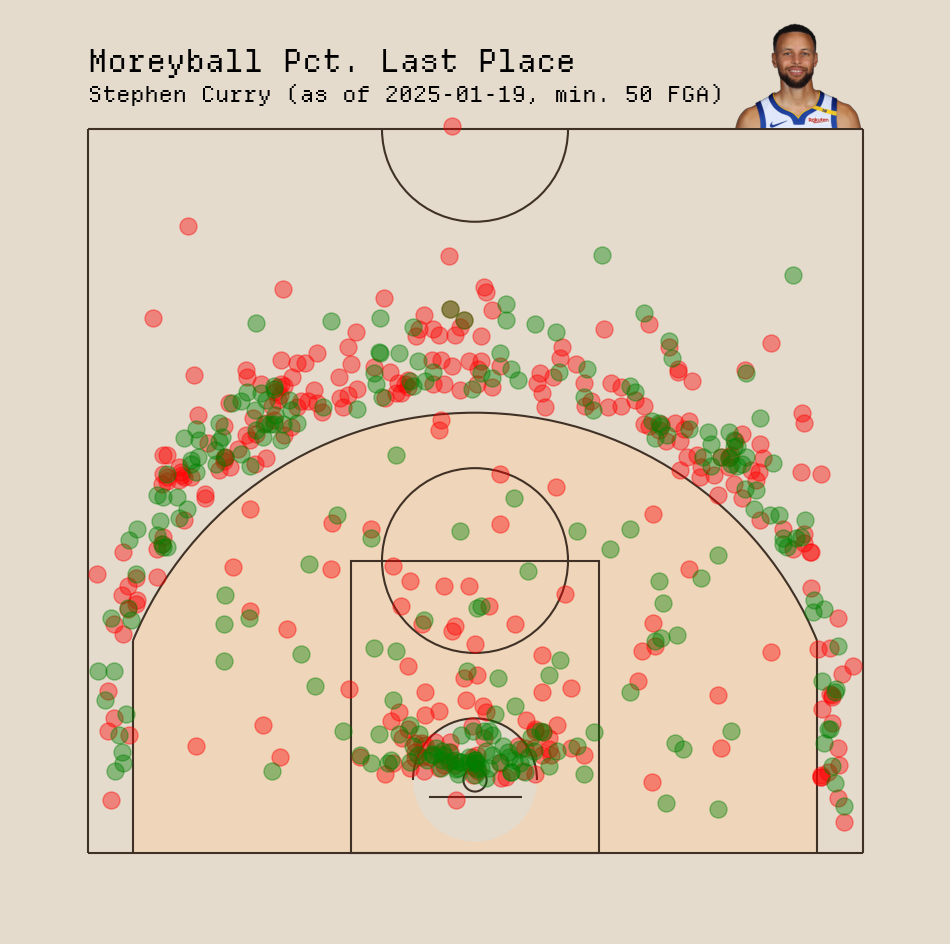

In [34]:
title_text = "Moreyball League Leader - {season}"
dwplot.plot_shots(
                    title_text="Moreyball Pct. Last Place",
                    subtitle_text = dwplot.player_name + " (as of {date}, min. 50 FGA)".format(date=datetime.today().strftime('%Y-%m-%d')),
                    save_plot=True)

# dwplot.plot_shots(subtitle_text=dwplot.player_name, title_text="Moreyball League Leader", save_plot=True)